In [1]:
import deepdish.io as io
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [10]:
matplotlib.rcParams.update({'font.size': 40})

In [2]:
e = h5py.File('../data/electrons-10GeV-incidence-perp.hdf5', 'r')
y = h5py.File('../data/gamma-10GeV-incidence-perp.hdf5', 'r')

In [3]:
e0 = e['layer_0'][:]
e1 = e['layer_1'][:]
e2 = e['layer_2'][:]
y0 = y['layer_0'][:]
y1 = y['layer_1'][:]
y2 = y['layer_2'][:]

In [4]:
sizes = [e0.shape[1], e0.shape[2], e1.shape[1], e1.shape[2], e2.shape[1], e2.shape[2]]

In [32]:
e0.sum(axis=(1,2)).mean()

3044.7941375983692

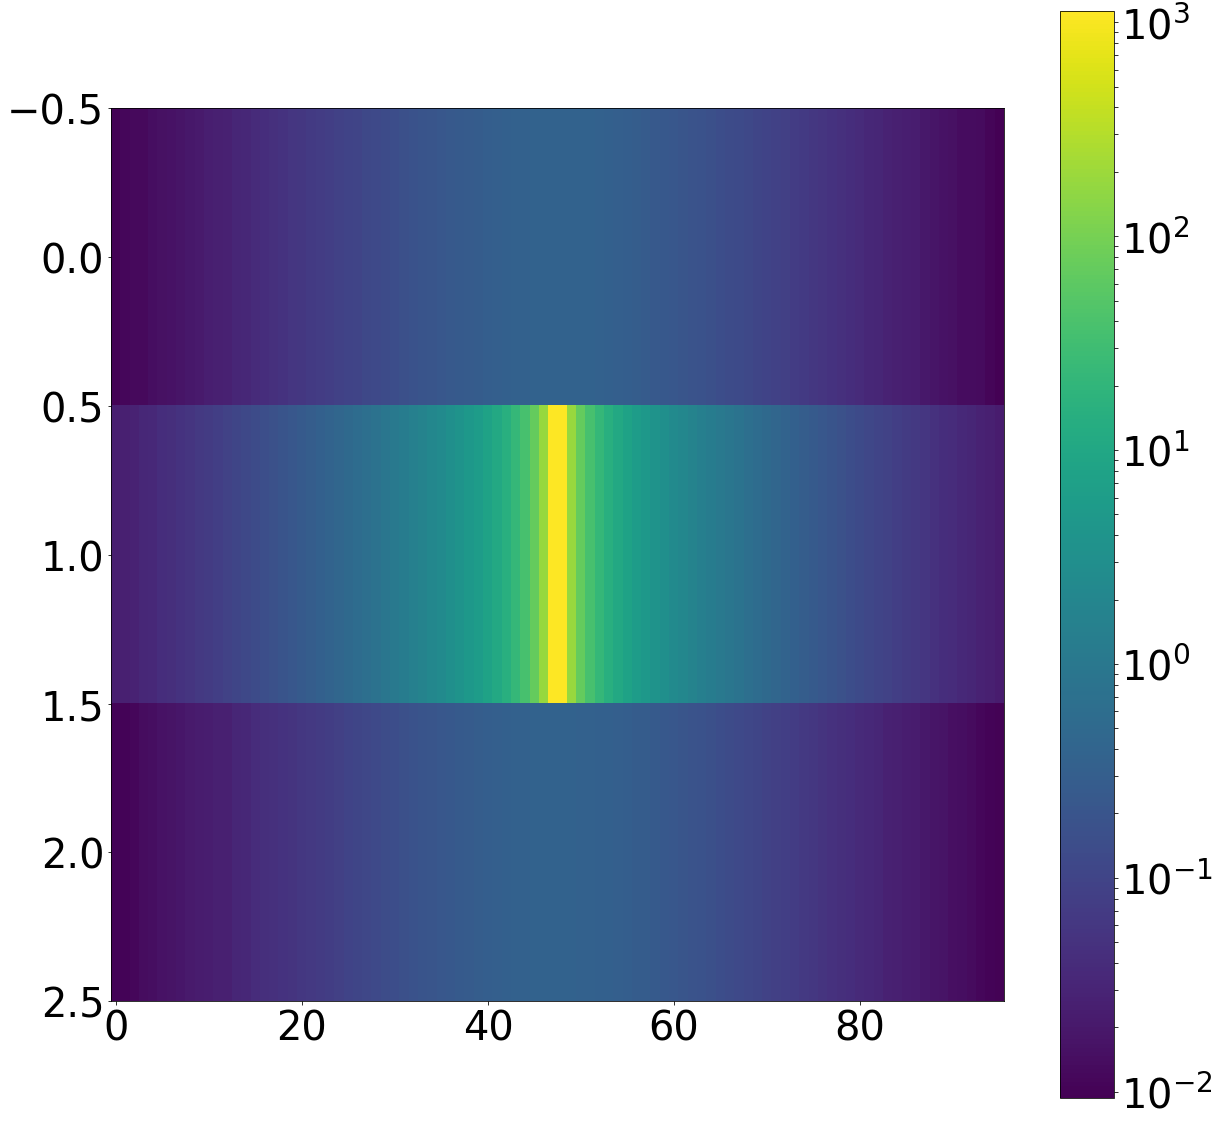

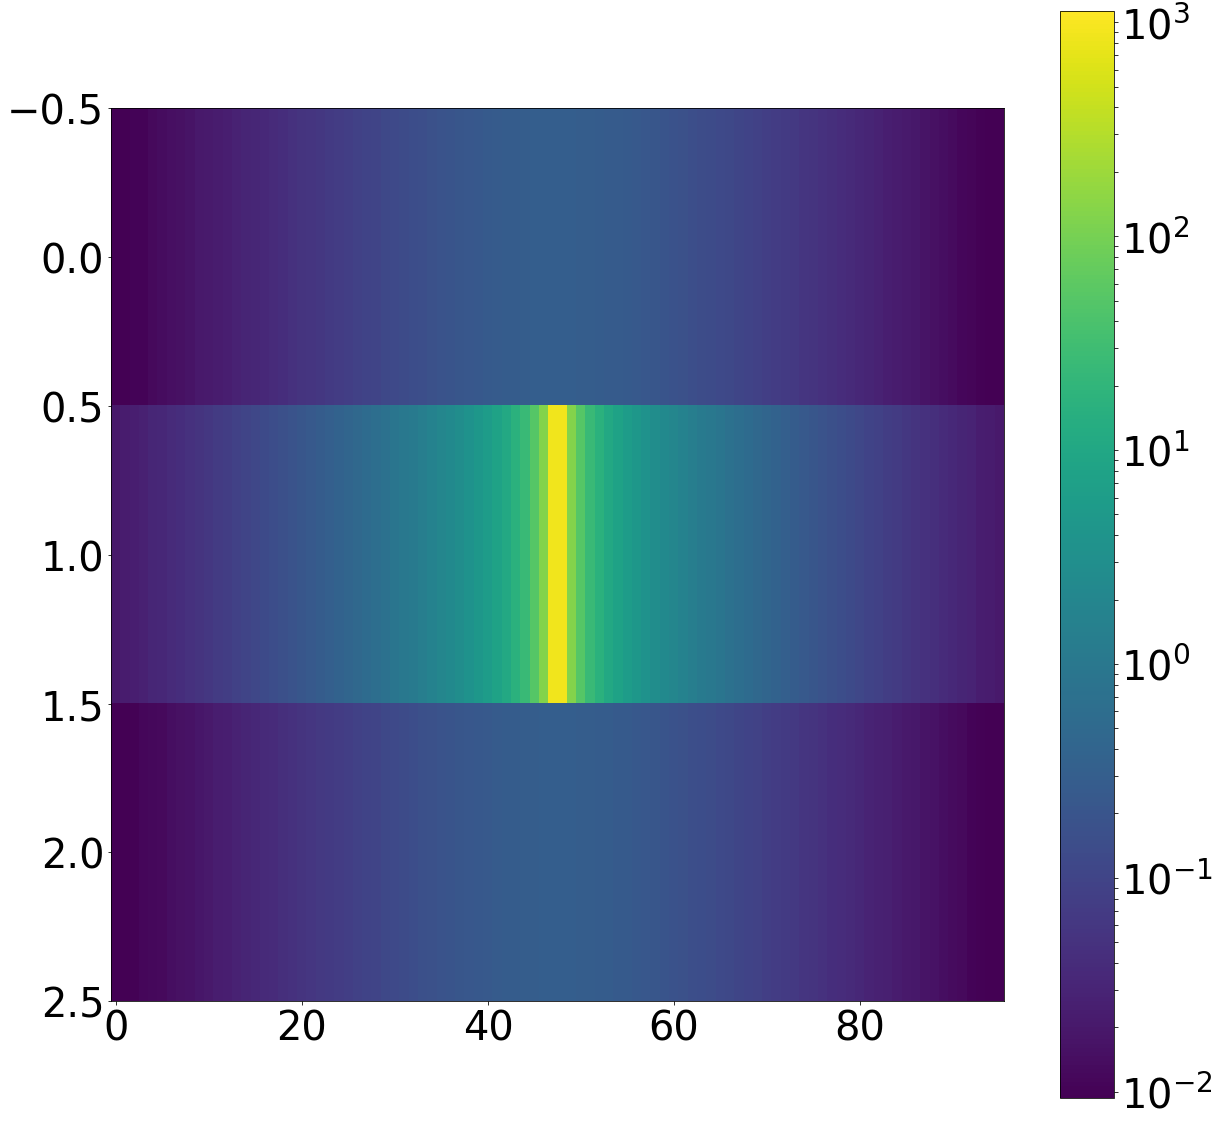

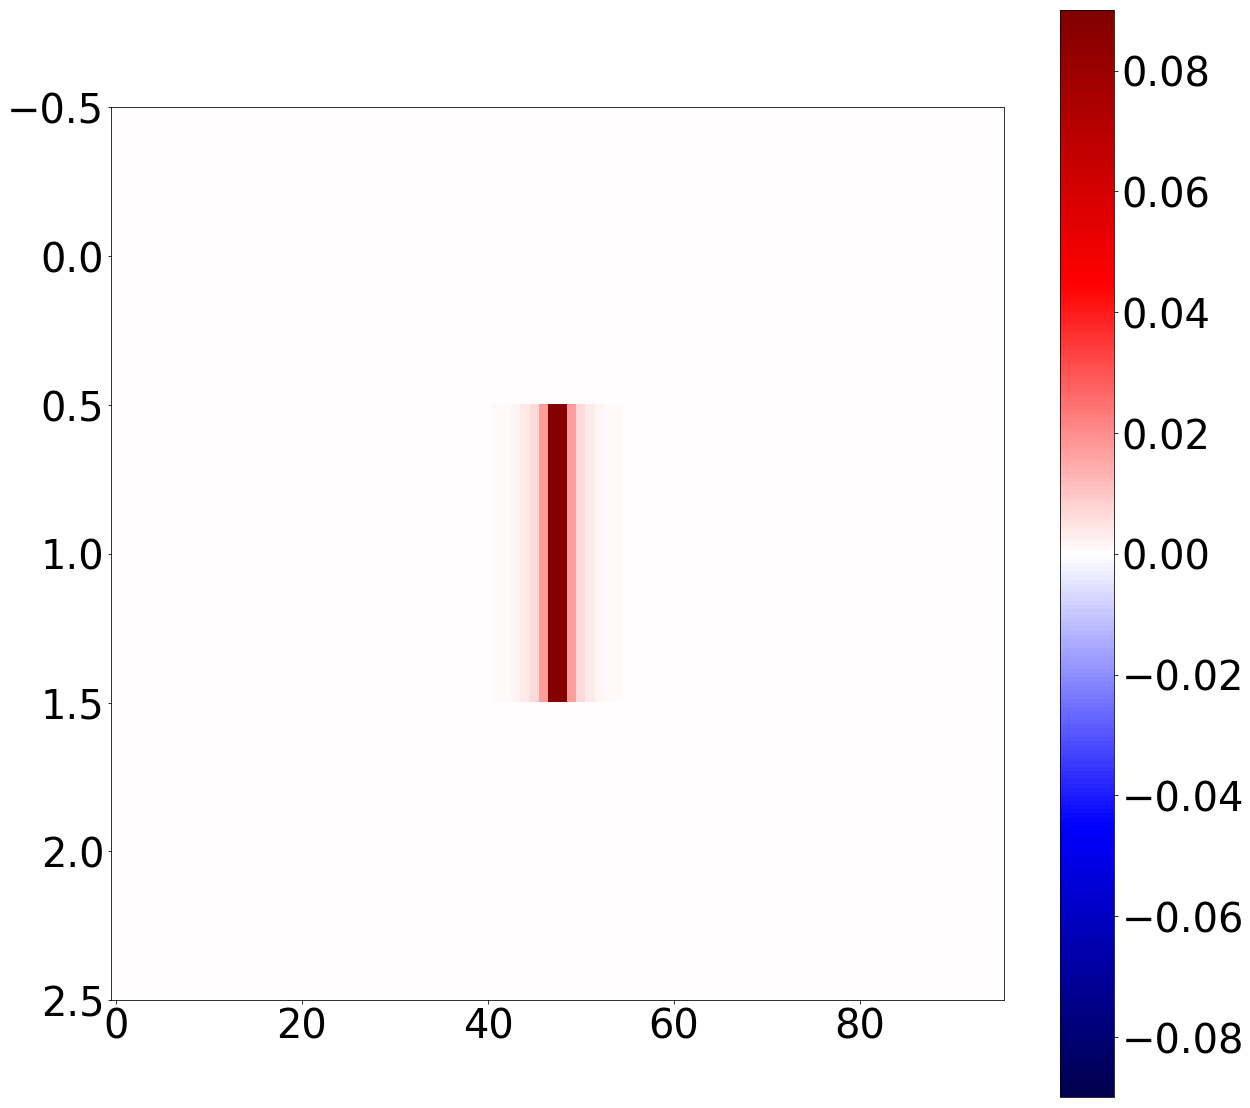

In [36]:
# average electron layer 0, average gamma layer 0, difference between the two
## Note: the difference is plotted as a percentage of the total energy deposited, on 
##       average in that layer in electron events

vmin = e0.mean(axis=0).min()
vmax = e0.mean(axis=0).max()

plt.figure(figsize=(20,20))
plt.imshow(e0.mean(axis=0),
           aspect=float(sizes[1])/sizes[0],
           interpolation='nearest',
           norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.show()


plt.figure(figsize=(20,20))
plt.imshow(y0.mean(axis=0),
           aspect=float(sizes[1])/sizes[0],
           interpolation='nearest',
           norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.show()


plt.figure(figsize=(20,20))
plt.imshow((e0.mean(axis=0) - y0.mean(axis=0)) / e0.sum(axis=(1,2)).mean(),
           aspect=float(sizes[1])/sizes[0],
           interpolation='nearest',
           cmap='seismic',
           vmin=-0.09, vmax=0.09
           #norm=LogNorm(vmin=vmin, vmax=vmax)
          )
plt.colorbar()
plt.show()

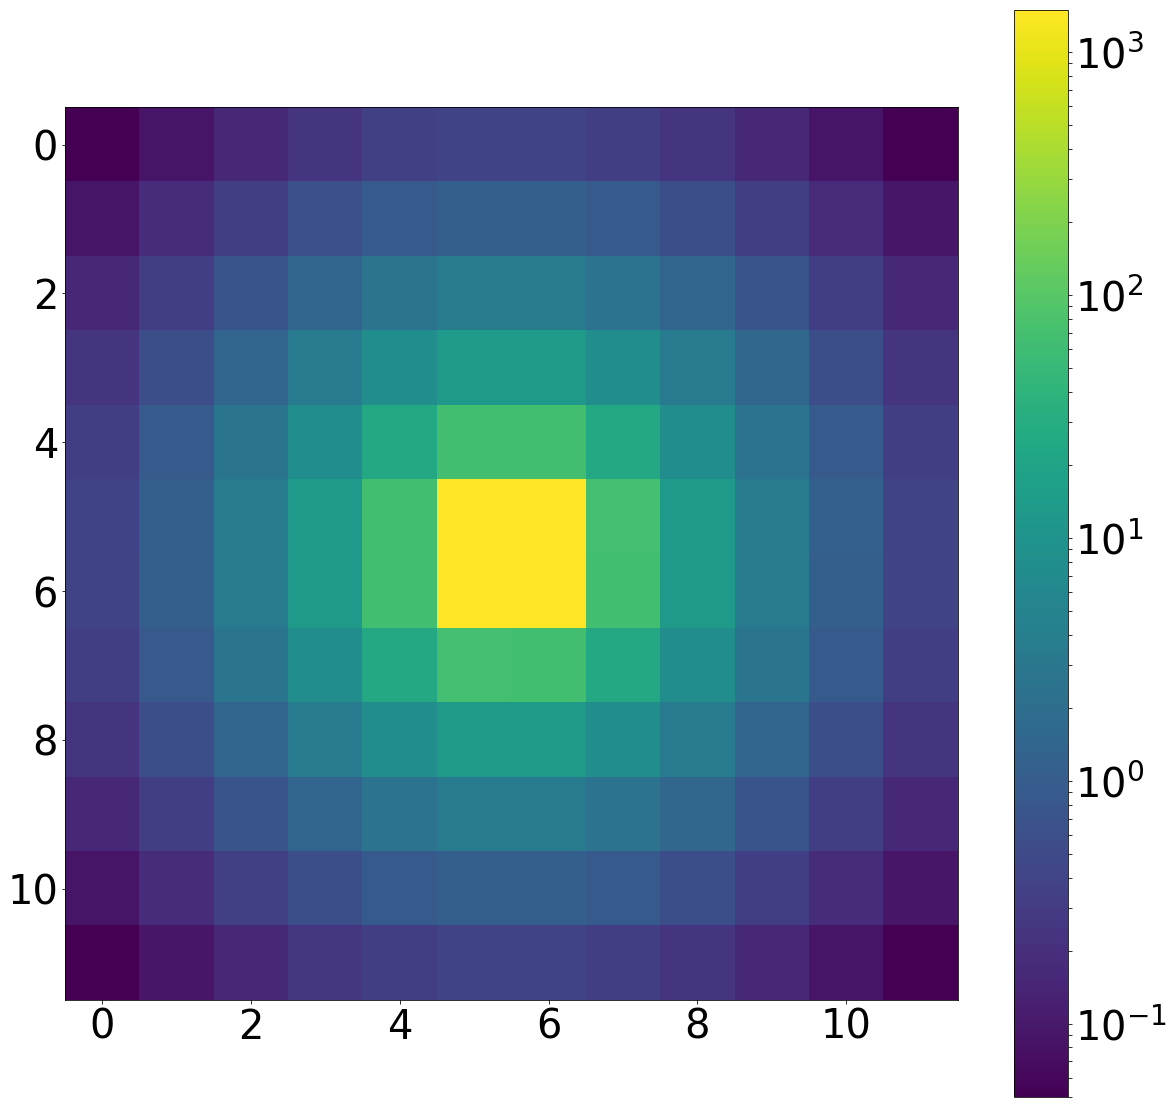

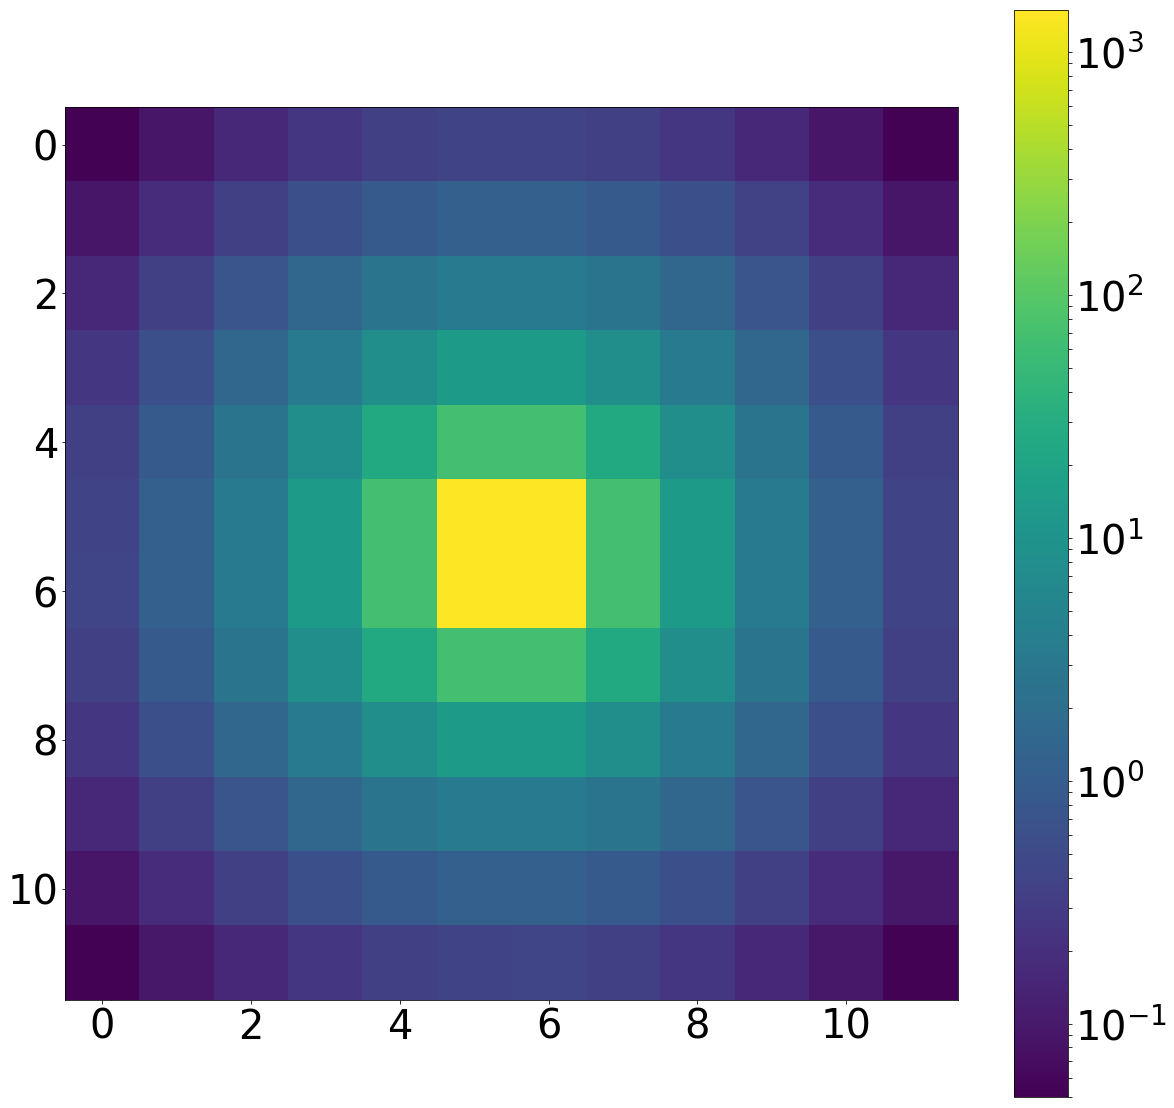

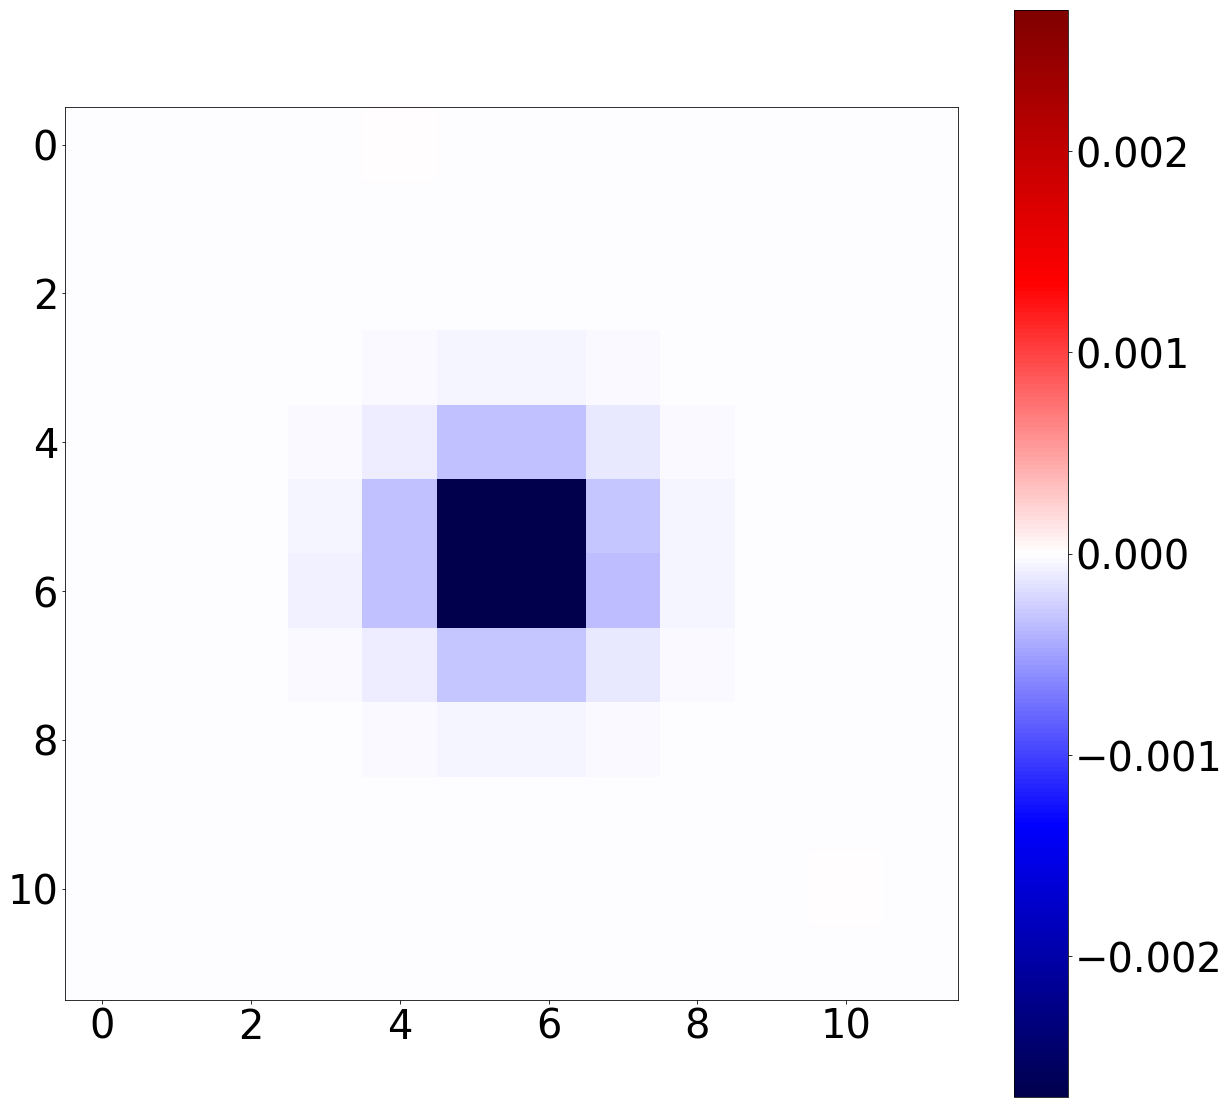

In [38]:
# average electron layer 1, average gamma layer 1, difference between the two
vmin = e1.mean(axis=0).min()
vmax = e1.mean(axis=0).max()

plt.figure(figsize=(20,20))
plt.imshow(e1.mean(axis=0),
           aspect=float(sizes[3])/sizes[2],
           interpolation='nearest',
           norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.show()


plt.figure(figsize=(20,20))
plt.imshow(y1.mean(axis=0),
           aspect=float(sizes[3])/sizes[2],
           interpolation='nearest',
           norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.show()


plt.figure(figsize=(20,20))
plt.imshow((e1.mean(axis=0) - y1.mean(axis=0)) / e1.sum(axis=(1,2)).mean(),
           aspect=float(sizes[3])/sizes[2],
           interpolation='nearest',
           cmap='seismic',
           vmin=-0.0027, vmax=0.0027
           #norm=LogNorm(vmin=vmin, vmax=vmax)
          )
plt.colorbar()
plt.show()

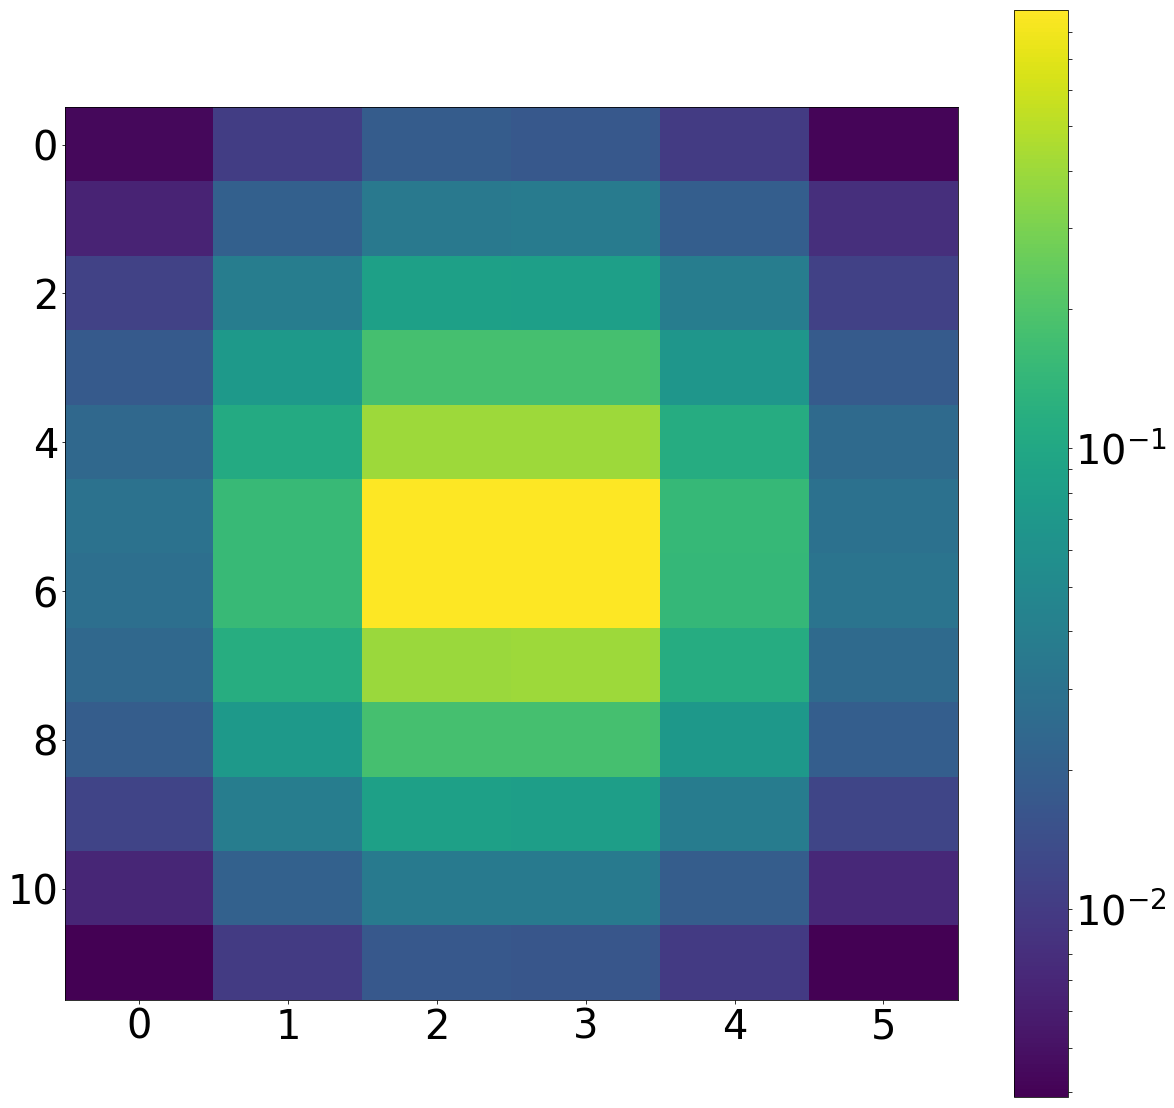

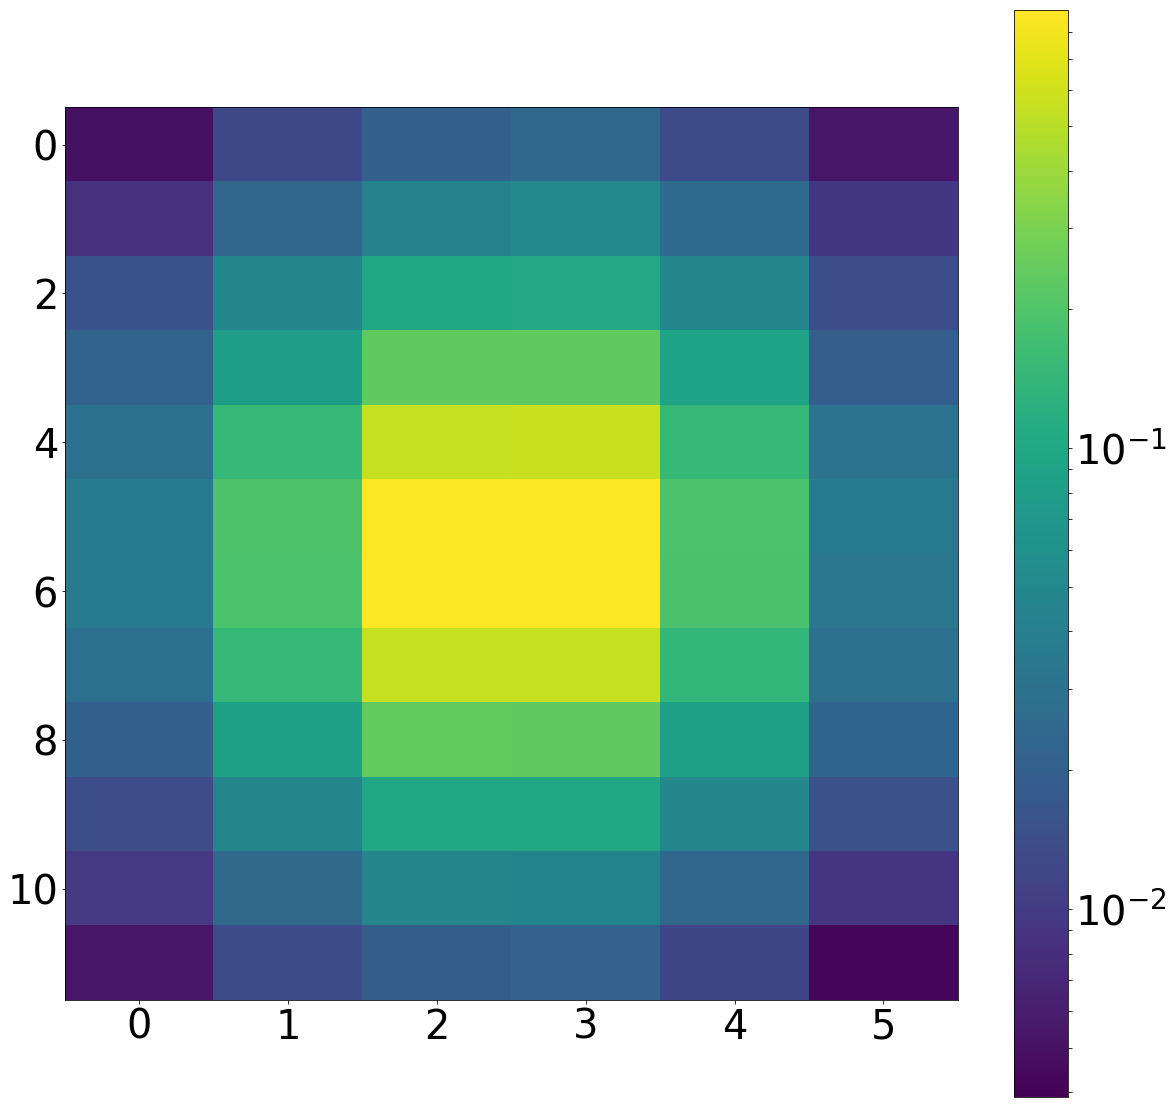

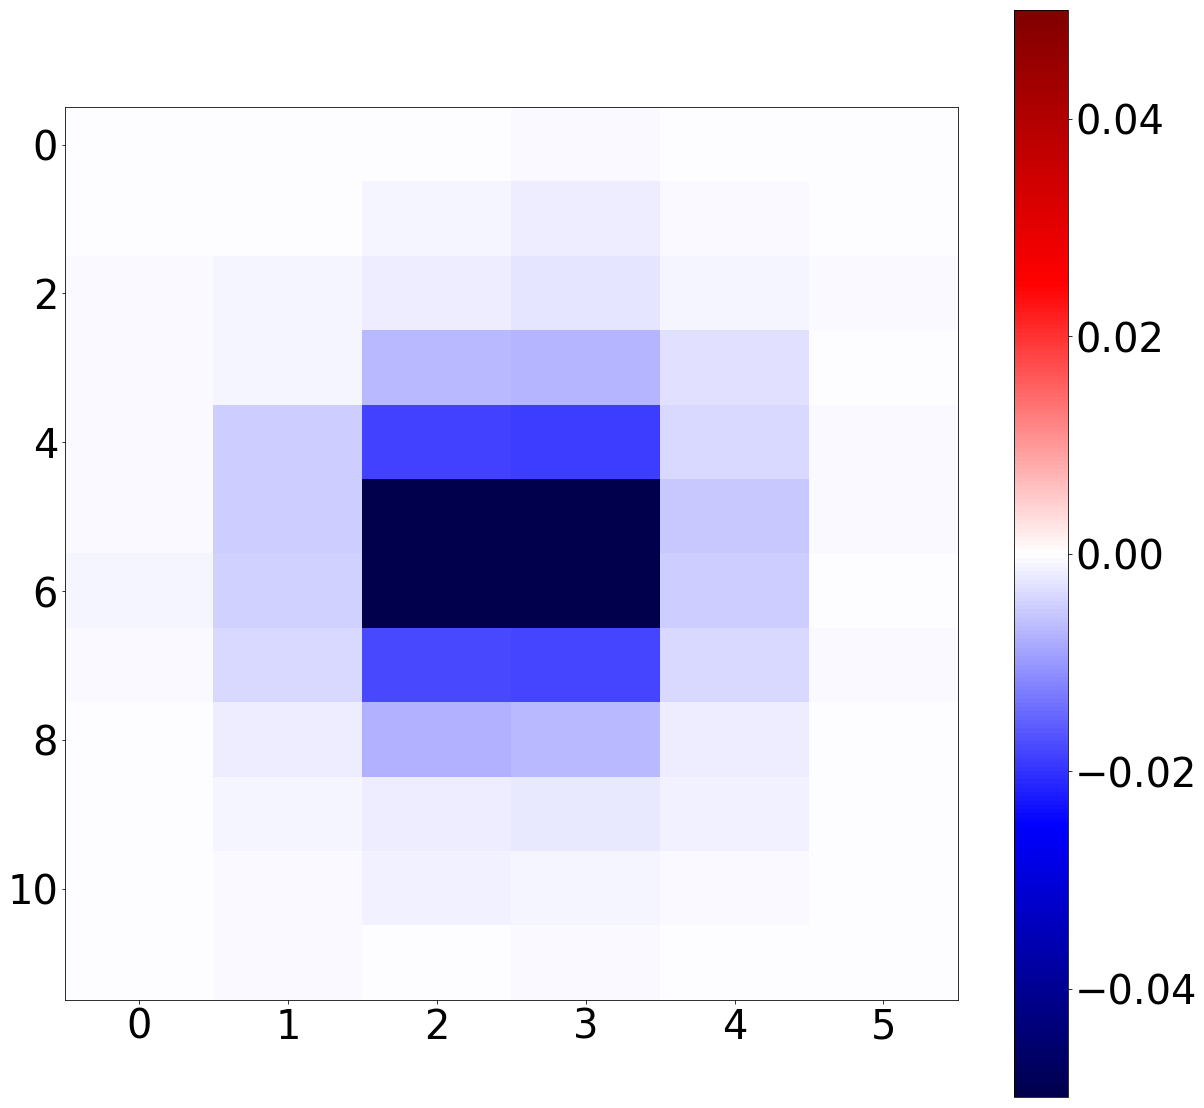

In [40]:
# average electron layer 2, average gamma layer 2, difference between the two
vmin = e2.mean(axis=0).min()
vmax = e2.mean(axis=0).max()

plt.figure(figsize=(20,20))
plt.imshow(e2.mean(axis=0),
           aspect=float(sizes[5])/sizes[4],
           interpolation='nearest',
           norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.show()


plt.figure(figsize=(20,20))
plt.imshow(y2.mean(axis=0),
           aspect=float(sizes[5])/sizes[4],
           interpolation='nearest',
           norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.show()


plt.figure(figsize=(20,20))
plt.imshow((e2.mean(axis=0) - y2.mean(axis=0)) / e2.sum(axis=(1,2)).mean(),
           aspect=float(sizes[5])/sizes[4],
           interpolation='nearest',
           cmap='seismic',
           vmin=-0.05, vmax=0.05
           #norm=LogNorm(vmin=vmin, vmax=vmax)
          )
plt.colorbar()
plt.show()

Photons and electrons look somewhat different! Electrons tend to deposit more energy in the 0th layer, while, photons penetrate deeper into the EM calorimeter and deposit more energy in the 1st and 2nd layer.
This can be used to discriminate between the two classes, along with 1d shower shapes.

In [41]:
from feats1d import *

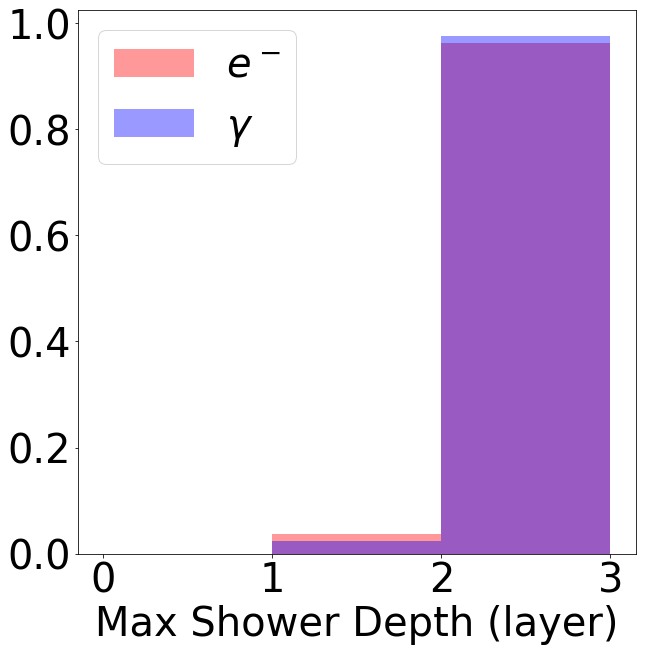

In [50]:
bins = [0, 1, 2, 3]
plt.figure(figsize=(10, 10))
_ = plt.hist(depth(e), bins=bins, histtype='stepfilled', alpha=0.4, normed='True', label=r'$e^-$', color='red')
_ = plt.hist(depth(y), bins=bins, histtype='stepfilled', alpha=0.4, normed='True', label=r'$\gamma$', color='blue')
plt.legend(loc='upper left')
plt.xlabel('Max Shower Depth (layer)')

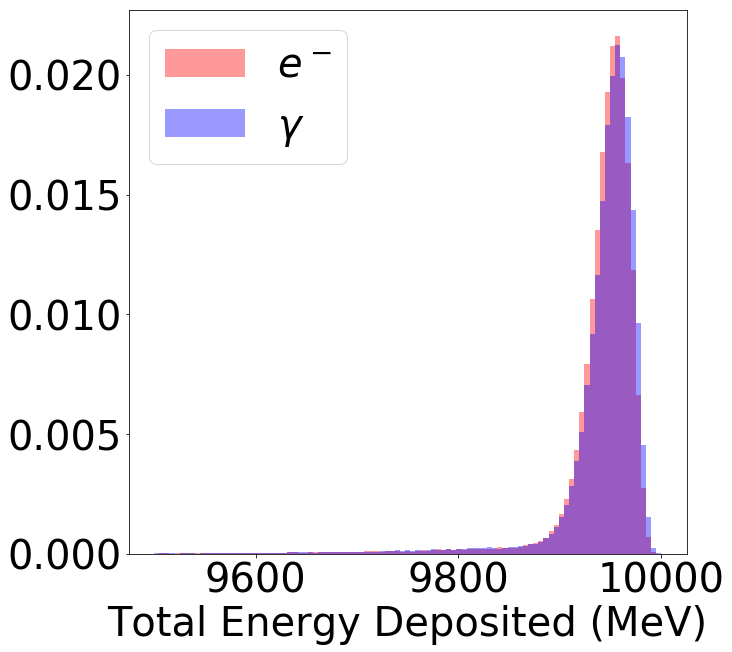

In [49]:
bins = np.linspace(9500, 10000, 100)
plt.figure(figsize=(10, 10))
_ = plt.hist(total_energy(e), bins=bins, histtype='stepfilled', alpha=0.4, normed='True', label=r'$e^-$', color='red')
_ = plt.hist(total_energy(y), bins=bins, histtype='stepfilled', alpha=0.4, normed='True', label=r'$\gamma$', color='blue')
plt.legend(loc='upper left')
plt.xlabel('Total Energy Deposited (MeV)')

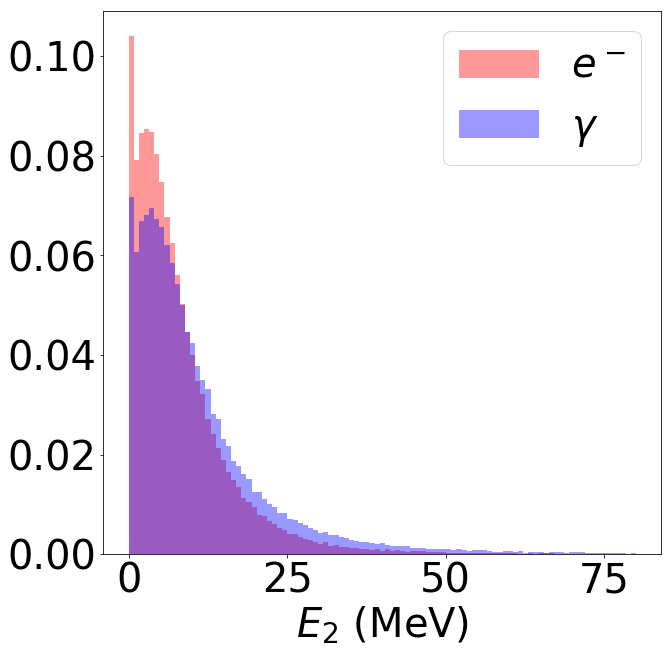

In [56]:
bins = np.linspace(0, 80, 100)
plt.figure(figsize=(10, 10))
_ = plt.hist(energy('2', e), bins=bins, histtype='stepfilled', alpha=0.4, normed='True', label=r'$e^-$', color='red')
_ = plt.hist(energy('2', y), bins=bins, histtype='stepfilled', alpha=0.4, normed='True', label=r'$\gamma$', color='blue')
plt.legend(loc='upper right')
plt.xlabel(r'$E_2$ (MeV)')

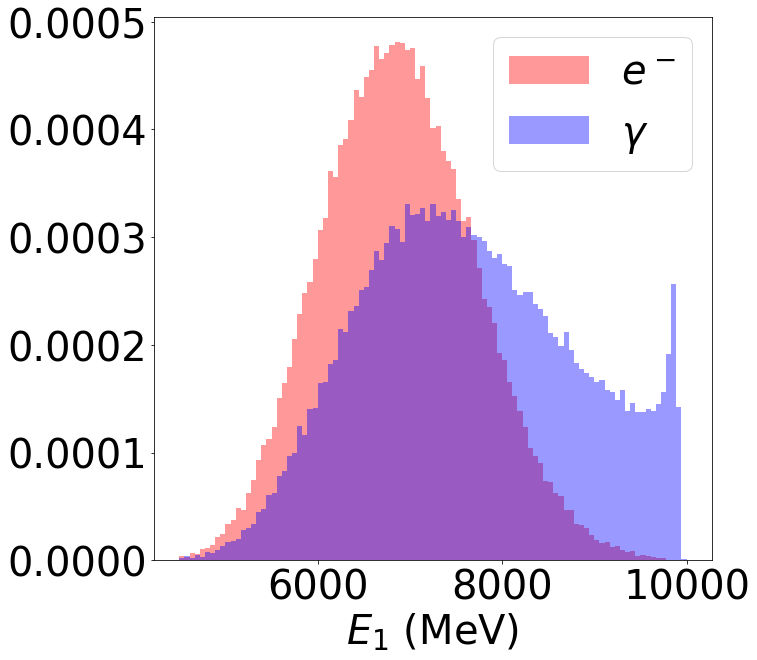

In [57]:
bins = np.linspace(4500, 10000, 100)
plt.figure(figsize=(10, 10))
_ = plt.hist(energy('1', e), bins=bins, histtype='stepfilled', alpha=0.4, normed='True', label=r'$e^-$', color='red')
_ = plt.hist(energy('1', y), bins=bins, histtype='stepfilled', alpha=0.4, normed='True', label=r'$\gamma$', color='blue')
plt.legend(loc='upper right')
plt.xlabel(r'$E_1$ (MeV)')

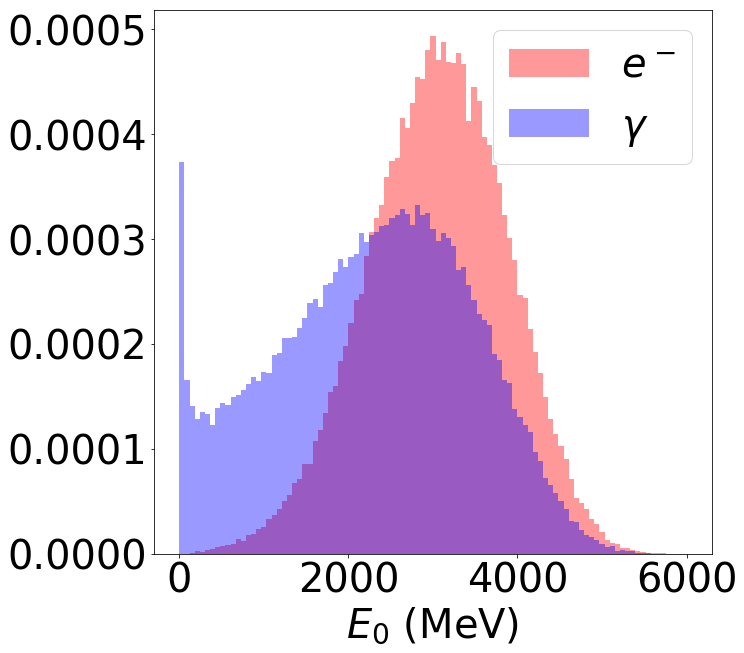

In [59]:
bins = np.linspace(0, 6000, 100)
plt.figure(figsize=(10, 10))
_ = plt.hist(energy('0', e), bins=bins, histtype='stepfilled', alpha=0.4, normed='True', label=r'$e^-$', color='red')
_ = plt.hist(energy('0', y), bins=bins, histtype='stepfilled', alpha=0.4, normed='True', label=r'$\gamma$', color='blue')
plt.legend(loc='upper right')
plt.xlabel(r'$E_0$ (MeV)')

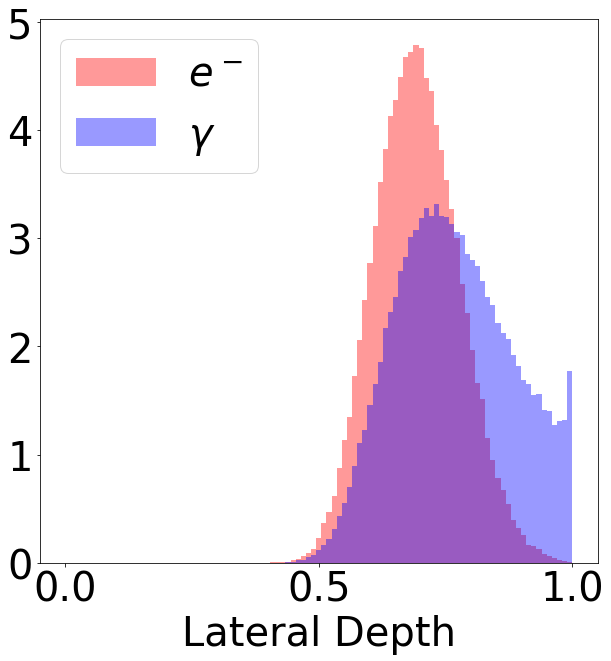

In [62]:
bins = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 10))
_ = plt.hist(lateral_depth(e) / total_energy(e), bins=bins, histtype='stepfilled', alpha=0.4, normed='True', label=r'$e^-$', color='red')
_ = plt.hist(lateral_depth(y)/ total_energy(y), bins=bins, histtype='stepfilled', alpha=0.4, normed='True', label=r'$\gamma$', color='blue')
plt.legend(loc='upper left')
plt.xlabel('Lateral Depth')

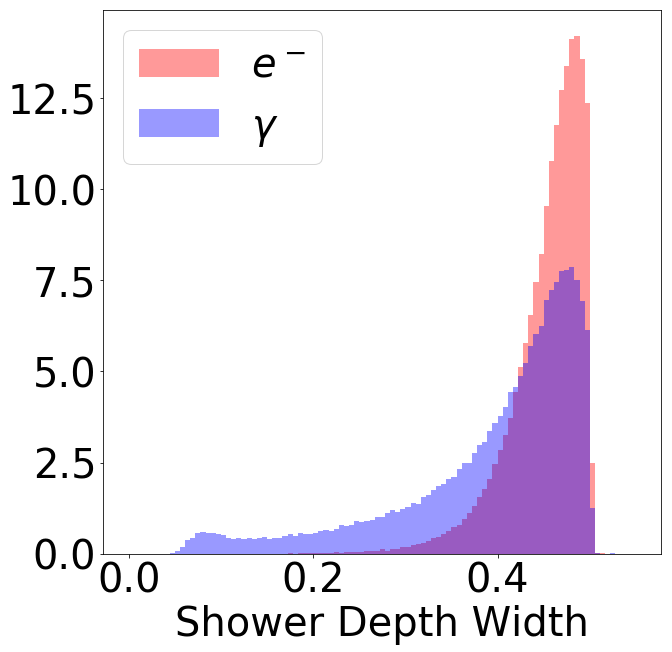

In [65]:
# shower depth width
bins = np.linspace(0, 0.55, 100)
plt.figure(figsize=(10, 10))
_ = plt.hist(shower_depth_width(lateral_depth(e), lateral_depth2(e), total_energy(e)),
             bins=bins, histtype='stepfilled', alpha=0.4, normed='True',
             label=r'$e^-$', color='red')
_ = plt.hist(shower_depth_width(lateral_depth(y), lateral_depth2(y), total_energy(y)),
             bins=bins, histtype='stepfilled', alpha=0.4, normed='True',
             label=r'$\gamma$', color='blue')
plt.legend(loc='upper left')
plt.xlabel('Shower Depth Width')

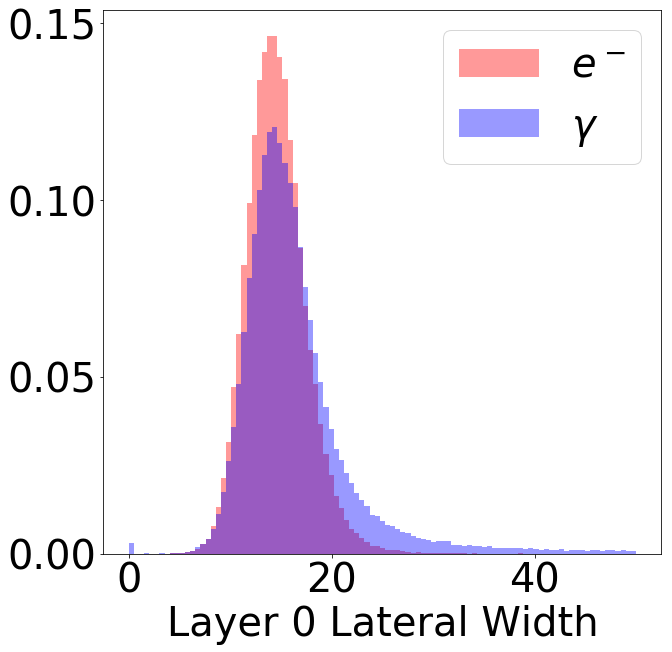

In [73]:
# layer 0 lateral width
bins = np.linspace(0, 50, 100)
plt.figure(figsize=(10, 10))
_ = plt.hist(layer_lateral_width('0', e)[np.isfinite(layer_lateral_width('0', e))],
             bins=bins, histtype='stepfilled', alpha=0.4,
             normed='True', label=r'$e^-$', color='red')
_ = plt.hist(layer_lateral_width('0', y)[np.isfinite(layer_lateral_width('0', y))],
             bins=bins, histtype='stepfilled', alpha=0.4,
             normed='True', label=r'$\gamma$', color='blue')
plt.legend(loc='upper right')
plt.xlabel('Layer 0 Lateral Width')

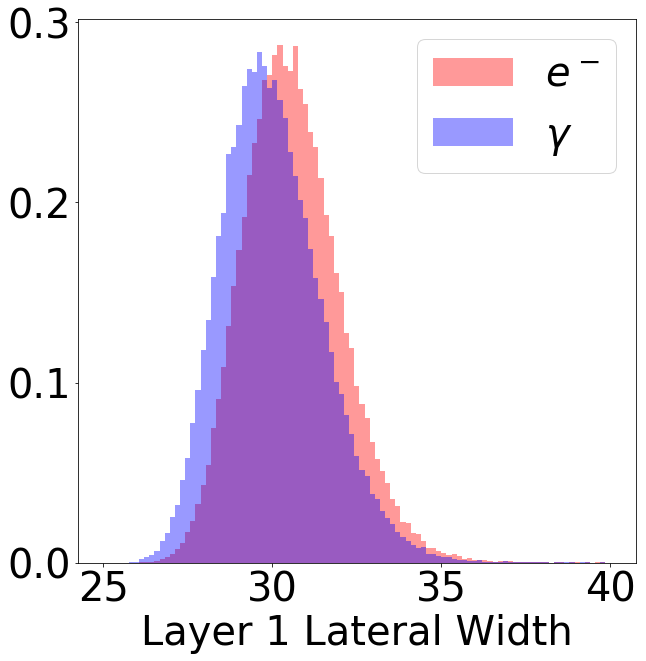

In [72]:
# layer 1 lateral width
bins = np.linspace(25, 40, 100)
plt.figure(figsize=(10, 10))
_ = plt.hist(layer_lateral_width('1', e)[np.isfinite(layer_lateral_width('1', e))],
             bins=bins, histtype='stepfilled', alpha=0.4,
             normed='True', label=r'$e^-$', color='red')
_ = plt.hist(layer_lateral_width('1', y)[np.isfinite(layer_lateral_width('1', y))],
             bins=bins, histtype='stepfilled', alpha=0.4,
             normed='True', label=r'$\gamma$', color='blue')
plt.legend(loc='upper right')
plt.xlabel('Layer 1 Lateral Width')

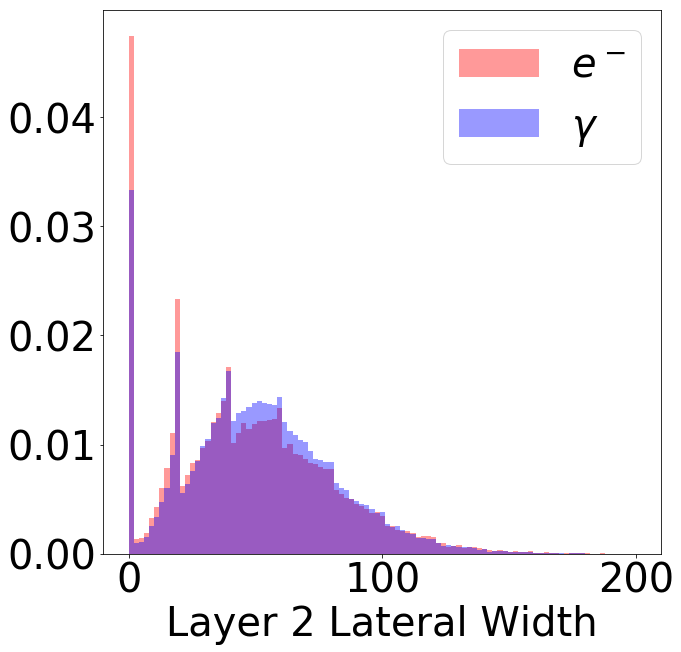

In [75]:
# layer 2 lateral width
bins = np.linspace(0, 200, 100)
plt.figure(figsize=(10, 10))
_ = plt.hist(layer_lateral_width('2', e)[np.isfinite(layer_lateral_width('2', e))],
             bins=bins, histtype='stepfilled', alpha=0.4,
             normed='True', label=r'$e^-$', color='red')
_ = plt.hist(layer_lateral_width('2', y)[np.isfinite(layer_lateral_width('2', y))],
             bins=bins, histtype='stepfilled', alpha=0.4,
             normed='True', label=r'$\gamma$', color='blue')
plt.legend(loc='upper right')
plt.xlabel('Layer 2 Lateral Width')